# montecarlo simulation

Understanding montecarlo -> https://pbpython.com/monte-carlo.html

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

Assume that our historical percent to target performance is centered around a a mean of 100% and standard deviation of 10%.

In [2]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

Now we can use numpy to generate a list of percentages that will replicate our historical normal distribution.

In [3]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

In [4]:
pct_to_target

array([1.06, 0.98, 0.97, 0.87, 1.12, 1.11, 1.  , 1.01, 0.96, 1.02, 1.05,
       1.02, 0.9 , 0.89, 0.89, 1.13, 1.07, 1.04, 1.05, 1.06, 0.87, 0.99,
       0.95, 1.03, 0.82, 0.79, 0.86, 0.84, 1.12, 1.02, 0.87, 0.94, 0.99,
       1.09, 1.13, 0.92, 0.93, 0.95, 1.18, 0.96, 1.17, 1.07, 1.05, 0.94,
       1.11, 0.94, 0.92, 1.1 , 0.92, 0.99, 0.92, 1.06, 1.02, 0.71, 1.1 ,
       1.04, 0.9 , 0.83, 0.99, 0.92, 1.12, 0.87, 0.86, 1.01, 0.87, 1.  ,
       0.91, 1.01, 1.08, 1.05, 1.07, 1.06, 0.97, 0.99, 1.05, 1.05, 0.98,
       0.99, 0.92, 0.86, 1.1 , 1.11, 0.97, 0.94, 1.08, 1.04, 1.05, 0.94,
       0.9 , 0.96, 1.06, 0.89, 0.92, 1.11, 0.92, 1.07, 1.04, 1.01, 0.97,
       1.01, 1.09, 0.96, 0.89, 1.21, 1.14, 1.19, 1.15, 0.95, 1.21, 0.93,
       0.9 , 1.01, 1.04, 0.93, 0.88, 1.06, 1.  , 0.93, 1.11, 1.18, 0.93,
       0.99, 0.94, 0.84, 0.77, 1.1 , 1.06, 1.04, 0.97, 1.14, 1.09, 0.99,
       1.11, 1.13, 1.09, 1.31, 1.13, 0.97, 0.97, 1.15, 0.93, 0.95, 0.98,
       1.04, 1.15, 1.1 , 0.92, 1.13, 1.07, 0.83, 1.

In [5]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [6]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

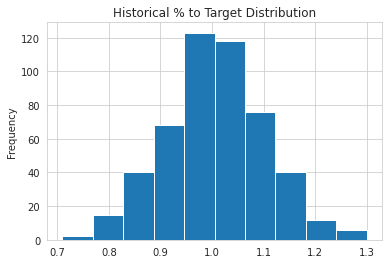

In [12]:
# Simple histogram to confirm distribution looks as expected
df['Pct_To_Target'].plot(kind='hist', title='Historical % to Target Distribution')

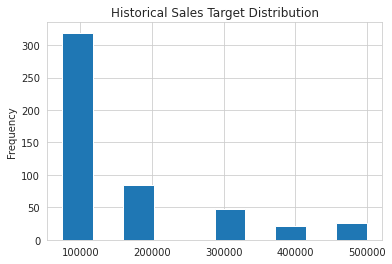

In [13]:
# Look at the sales target distribution
df['Sales_Target'].plot(kind='hist', title='Historical Sales Target Distribution')

In [7]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [8]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [9]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [10]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [11]:
results_df.describe().style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,629,383.5","2,853,543.488","83,644,000.0"
std,"2,839,927.576068601","105,942.3461413791","2,803,725.8476228784"
min,"74,853,500.0","2,527,720.0","75,225,000.0"
25%,"81,616,687.5","2,782,656.0","81,750,000.0"
50%,"83,612,125.0","2,850,823.5","83,550,000.0"
75%,"85,493,562.5","2,923,719.5","85,425,000.0"
max,"91,411,250.0","3,172,010.0","92,125,000.0"


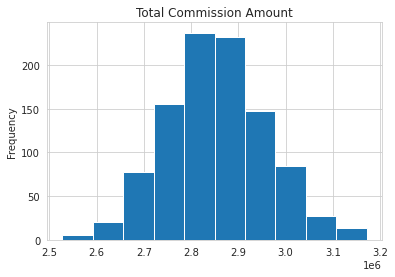

In [14]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")

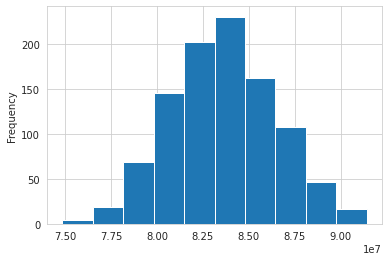

In [15]:
results_df['Sales'].plot(kind='hist')